# KMeans from scratch
Simple Python exercise in which we implement a naive version of KMeans by exploiting <code>numpy</code>.

## STEP 1: getting 2-dimensional data from the traffic sample 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time

In [3]:
accidents = '../data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)
L = A[['Longitude', 'Latitude']]
sample = np.random.choice(L.index, 50)
S = L.loc[sample]

## STEP 2: visualize data and select K

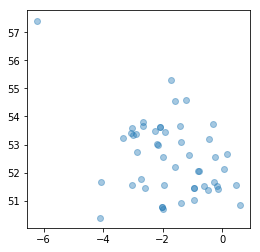

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.scatter(S.Longitude, S.Latitude, alpha=0.4)
plt.show()

In [6]:
k = 3
colors = ['#FF9900', '#FF0000', '#009900']

In [7]:
executions = []

## STEP 3: create random clusters

In [8]:
centroids, clusters = [], {}
xmn, xmx = S.Longitude.min(), S.Longitude.max()
ymn, ymx = S.Latitude.min(), S.Latitude.max()
for x in range(0, k):
    centroids.append(np.array([np.random.uniform(xmn, xmx), np.random.uniform(ymn, ymx)]))
    clusters[x] = []

### Centroid visualization

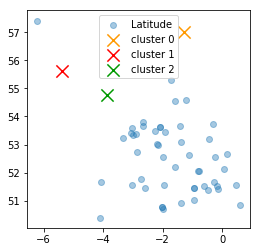

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.scatter(S.Longitude, S.Latitude, alpha=0.4)
for i, centroid in enumerate(centroids):
    axes.scatter(centroid[0], centroid[1], 
                 c=colors[i], label="cluster {}".format(i), marker='x', s=150)
plt.legend()
plt.show()

## STEP 4: assignment
Assign each point to the cluster corresponding to the nearest centroid

In [16]:
new_clusters = dict([(k, []) for k, v in clusters.items()])
for i, row in S.iterrows():
    point = np.array(row)
    distances = [distance.euclidean(point, x) for x in centroids]
    nearest = np.argmin(distances)
    new_clusters[nearest].append(point)
clusters = new_clusters

### Assignment visualization

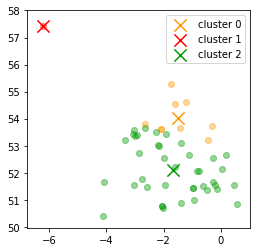

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
for cluster, points in clusters.items():
    pts = np.array(points)
    if len(pts) > 0:
        axes.scatter(pts[:,0], pts[:,1], alpha=0.4, c=colors[cluster])
for i, centroid in enumerate(centroids):
    axes.scatter(centroid[0], centroid[1], c=colors[i], label="cluster {}".format(i), marker='x', s=150)
plt.legend()
plt.show()

## STEP 5: calculate RSV and recompute centroids
Calculate:
$$
\sum\limits_{i}^{k}\sum\limits_{x}^{C_i} \mid\mid \vec{x} - \vec{\mu_i}\mid\mid^2
$$

In [26]:
s = 0
for i, (k, cluster) in enumerate(clusters.items()):
    distances = np.array([distance.euclidean(centroids[i], x) for x in cluster])
    s += distances.sum()
for i, (k, cluster) in enumerate(clusters.items()):
    centroids[i] = np.mean(cluster, axis=0)

## STEP 6: monitor executions

In [27]:
executions.append(s)

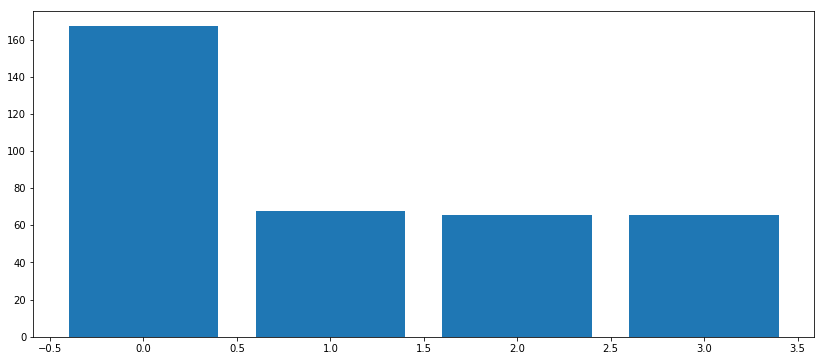

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
axes.bar(range(0, len(executions)), executions)
plt.show()

# Put all together

In [6]:
from IPython.display import clear_output

def kmeans(data, k, colors, fsize=(14, 4)):
    executions = []
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fsize)
    centroids, clusters = [], {}
    xmn, xmx = data.iloc[:,0].min(), data.iloc[:,0].max()
    ymn, ymx = data.iloc[:,1].min(), data.iloc[:,1].max()
    for x in range(0, k):
        centroids.append(np.array([np.random.uniform(xmn, xmx), np.random.uniform(ymn, ymx)]))
        clusters[x] = []
    axes[0].scatter(data.iloc[:,0], data.iloc[:,1], alpha=0.4)
    for i, centroid in enumerate(centroids):
        axes[0].scatter(centroid[0], centroid[1], 
                     c=colors[i], label="cluster {}".format(i), 
                        marker='x', s=150)
    plt.show()
    run = True
    while(run):
        time.sleep(0.8)
        clear_output(wait=True)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fsize)
        axes[0].clear()
        axes[1].clear()
        new_clusters = dict([(k, []) for k, v in clusters.items()])
        for i, row in data.iterrows():
            point = np.array(row)
            distances = [distance.euclidean(point, x) for x in centroids]
            nearest = np.argmin(distances)
            new_clusters[nearest].append(point)
        clusters = new_clusters
        for cluster, points in clusters.items():
            pts = np.array(points)
            if len(pts) > 0:
                axes[0].scatter(pts[:,0], pts[:,1], alpha=0.1, c=colors[cluster])
            for i, centroid in enumerate(centroids):
                axes[0].scatter(centroid[0], centroid[1], c=colors[i], 
                                    label="cluster {}".format(i), marker='x', s=150)
        s = 0
        for i, (k, cluster) in enumerate(clusters.items()):
            distances = np.array([distance.euclidean(centroids[i], x) for x in cluster])
            s += distances.sum()
        for i, (k, cluster) in enumerate(clusters.items()):
            centroids[i] = np.mean(cluster, axis=0)
        executions.append(s)
        axes[1].bar(range(0, len(executions)), executions)
        plt.show()
        if len(executions) > 1 and executions[-1] == executions[-2]:
            run = False

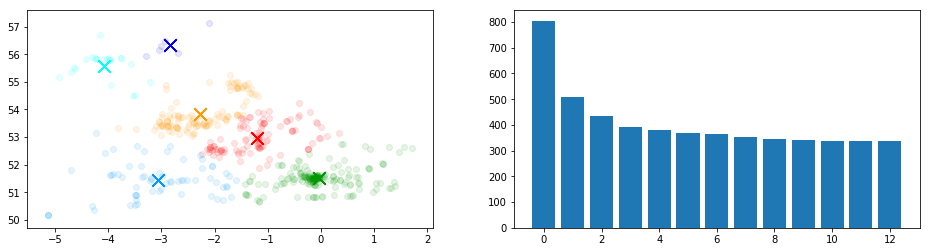

In [7]:
accidents = '../data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)
L = A[['Longitude', 'Latitude']]
sample = np.random.choice(L.index, 500)
data = L.loc[sample]
kmeans(data, k=6, colors=['#FF9900', '#FF0000', '#009900', 
                          '#00FFFF', '#0000FF', '#0099FF', 
                          '#00CCFF', '#FF99FF'], fsize=(16, 4))